In [1]:
# Description : Plotting Bear power and Bulls power with Exponential Moving Average (EMA).

In [49]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import plotly.graph_objects as go

In [50]:
# Get the Stock Symbol for the Portfolio 
# FAANG
stockSymbols = ['SBIN.NS']

# GET the stock starting date
stockDate = '2020-01-01'

stock_End_date = '2020-06-30'

In [51]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=stock_End_date):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end, )
  data.columns = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']
  return data

In [52]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-01,334.450012,334.450012,335.950012,332.149994,334.700012,17379320
2020-01-02,339.299988,339.299988,339.850006,333.350006,334.500000,20324236
2020-01-03,333.700012,333.700012,337.950012,332.000000,337.950012,21853208
2020-01-06,319.000000,319.000000,331.700012,317.700012,331.700012,35645325
2020-01-07,318.399994,318.399994,327.000000,315.399994,324.450012,50966826
...,...,...,...,...,...,...
2020-06-25,185.250000,185.250000,186.800003,180.399994,182.199997,73620385
2020-06-26,184.600006,184.600006,188.600006,183.800003,188.000000,49176958
2020-06-29,179.250000,179.250000,183.100006,178.500000,183.000000,50966428


# Bears Power and Bull Power indicator.
- From the name it looks like two separate trading inidcator. But to analysis the stock trend, we can't analysis the stock simply using just any one indicator. We have to use both together to get better stock trending or performance.
- So the Mathematical expression of Bull power and Bear power are given as :
  - **Bears Power** : 
$$Bull \ Power = {(Highest \ high \ candle)}-{EMA(period)}$$
  - **Bull Power**:
$$Bears \ Power = {(Lowest \ Low \ candle)}-{EMA(period)}$$

## Exponential Moving Average(EMA):
- The mathematical formula for EMA is given as:
$$EMA=Closing \ price * multiplier + EMA (previous \ day) * (1-multiplier)$$

  - multiplier =  2 ÷ (number of observations + 1)

In [53]:
# Calculate The Exponential Moving Avarage.
n = 3
EMA = my_stocks['Close'].ewm(span=n, adjust=False).mean()

## Bull Power:
- where period = 3,
- Stocks Column = 'Close'

In [55]:
# Calculate Bulls Power.
Bull_power = my_stocks['High'].rolling(3).max() - EMA

my_stocks['Bull_power'] = Bull_power

## Bears Power:
- where period = 3,
- Stocks Column = 'Close'

In [56]:
# Calculate Bulls Power.
Bears_power = my_stocks['Low'].rolling(3).min() - EMA

my_stocks['Bears_power'] = Bears_power

In [73]:
# Plot the Bull power and Bears Power on Plotly graph

# declare a figure
fig=go.Figure()

fig.add_trace(go.Scatter(x=my_stocks.index, y= my_stocks['Bears_power'], line=dict(width=1.5, color = 'red'), name = 'BEAR POWER'))
fig.add_trace(go.Scatter(x=my_stocks.index, y=my_stocks['Bull_power'], line=dict(width=1.5, color = 'green'), name = 'BULL POWER'))
fig.add_trace(go.Scatter(x=my_stocks.index, y=EMA, line=dict(width=1.5, color = 'blue'), name = 'EMA'))


fig.add_trace(go.Candlestick(x=my_stocks.index, open=my_stocks['Open'], high=my_stocks['High'], low=my_stocks['Low'], close=my_stocks['Close'], name = 'Market Data'))

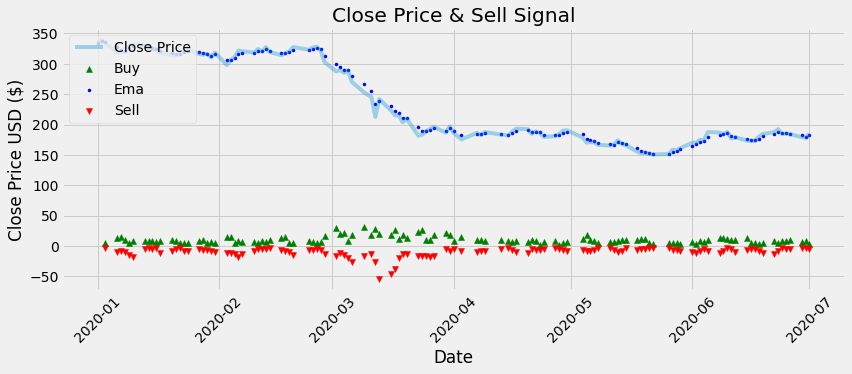

In [58]:
# Visually show the stock buy and sell signal
plt.figure(figsize=(12.5, 4.5))
plt.scatter(my_stocks.index, my_stocks['Bull_power'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(my_stocks.index, EMA, color='blue', label='Ema', marker='.', alpha=1)
plt.scatter(my_stocks.index, my_stocks['Bears_power'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(my_stocks['Close'], label='Close Price', alpha=0.35)
plt.xticks(rotation=45)
plt.title('Close Price & Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

## Bears Power & Bull Power using **tapy** API

In [44]:
!pip install tapy

In [66]:
from tapy import Indicators

indicators = Indicators(my_stocks)
indicators.bears_power(period=3, column_name='bears_power')
indicators.bulls_power(period=3, column_name='bulls_power')
df = indicators.df

In [67]:
df = indicators.df
df.tail()

,AdjClose,Close,High,Low,Open,Volume,Bull_power,Bears_power,bears_power,bulls_power
Date,,,,,,,,,,
2020-06-25,185.250000,185.250000,186.800003,180.399994,182.199997,73620385,9.046825,-5.453175,5.453175,0.946835
2020-06-26,184.600006,184.600006,188.600006,183.800003,188.000000,49176958,9.673407,-4.826593,1.426584,3.373419
2020-06-29,179.250000,179.250000,183.100006,178.500000,183.000000,50966428,6.361712,-3.738294,3.738294,0.861712
2020-06-30,178.449997,178.449997,182.899994,177.250000,181.100006,43613239,8.255861,-3.094145,3.094145,2.555849
2020-07-01,184.800003,184.800003,185.399994,178.600006,179.449997,54012853,2.827920,-5.322074,3.972068,2.827920


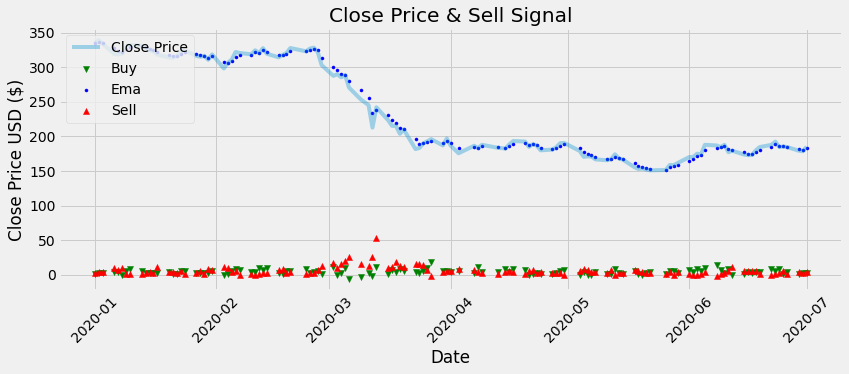

In [72]:
EMA# Visually show the stock buy and sell signal
plt.figure(figsize=(12.5, 4.5))
plt.scatter(my_stocks.index, df['bulls_power'], color='green', label='Buy', marker='v', alpha=1)
plt.scatter(my_stocks.index, EMA, color='blue', label='Ema', marker='.', alpha=1)
plt.scatter(my_stocks.index, df['bears_power'], color='red', label='Sell', marker='^', alpha=1)
plt.plot(my_stocks['Close'], label='Close Price', alpha=0.35)
plt.xticks(rotation=45)
plt.title('Close Price & Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()